## SciPy

Numpy上に構築された数学パッケージ

### 画像をぼかす
古典的な画像の畳み込み、ガウシアン

ガウシアンカーネルを使って画像Iを畳み込むと以下の式で表せる

$$I_\sigma = I * G_\sigma$$

ガウシアンカーネルは次のように定義される標準偏差$\sigma$の2Dガウシアンカーネル  
$$G_\sigma = \frac{1}{2\pi\sigma}e^{-\frac{(x^2+y^2)}{2\sigma^2}}$$

#### ガウシアンフィルタについて
ガウシアンフィルタは、画像処理では写真の平滑化などに使われるフィルタの1つ  
ガウス分布を利用して「注目画素からの距離に応じて近傍の画素値に重みをかける」という処理を行い、自然な平滑化を実現する  
[参考：【画像処理】ガウシアンフィルタの原理・特徴・計算式](https://algorithm.joho.info/image-processing/gaussian-filter/)


ガウス分布&rarr;正規分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
from scipy.ndimage import  filters

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3566918195.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im2 = filters.gaussian_filter(im, 5) # 標準偏差5のガウシアンフィルタを翔
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3566918195.py:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im3 = filters.gaussian_filter(im, 15) # 標準偏差15のガウシアンフィルタを翔


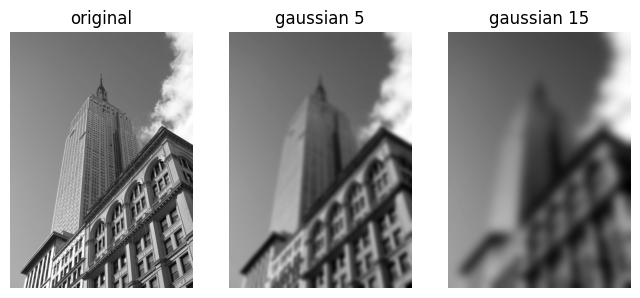

In [10]:
im = np.array(Image.open('../data/empire.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 5) # 標準偏差5のガウシアンフィルタを翔
im3 = filters.gaussian_filter(im, 15) # 標準偏差15のガウシアンフィルタを翔

plt.figure(figsize=(8,8))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(im)
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(im2)
plt.axis('off')
plt.title('gaussian 5')

plt.subplot(1,3,3)
plt.imshow(im3)
plt.axis('off')
plt.title('gaussian 15')

plt.show()

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3744370627.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3744370627.py:13: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im3[:,:,i] = filters.gaussian_filter(im[:,:,i],50)


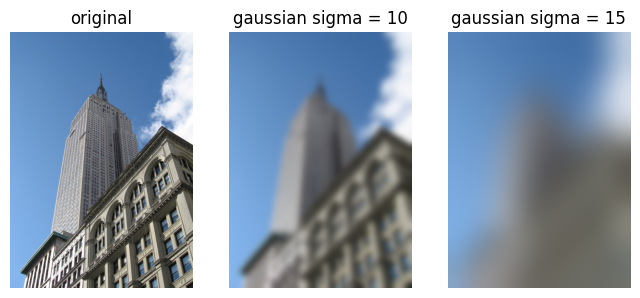

In [13]:
# シグマの値を増やすほどぼかしが強くなる

# カラーにガウシアンフィルタをかけるにはそれぞれの色チャンネルでフィルタをかける
im = np.array(Image.open('../data/empire.jpg'))
im2 = np.zeros(im.shape)
im3 = np.zeros(im.shape)

for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
im2 = np.uint8(im2)

for i in range(3):
    im3[:,:,i] = filters.gaussian_filter(im[:,:,i],50)
im3 = np.uint8(im3)

plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.imshow(im)
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(im2)
plt.axis('off')
plt.title('gaussian sigma = 10')

plt.subplot(1,3,3)
plt.imshow(im3)
plt.axis('off')
plt.title('gaussian sigma = 50')
plt.show()

### 画像の微分

